In [1]:
%pip install seaborn

     |████████████████████████████████| 292 kB 13.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import re
import seaborn as sns

In [4]:
def get_content(article_name):
  url = "https://en.wikipedia.org/w/api.php"
  params = {'action':'query', 'prop':'extracts', 'titles':article_name, 'format':'json'}
  response = requests.get(url, params = params)
  json_data = response.json()
  return json_data['query']['pages']['22834']['extract']

In [5]:
data = get_content("Ozone_layer")

In [6]:
def merge_contents(data):
  html = re.compile('<.*?>')
  clean = re.sub(html,'', data)
  soft_text = re.split("\. |, |\.|\n| |-|\'", clean)
  return soft_text
  
merge_content = merge_contents(data)

In [7]:
def tokenize(content):
  special_char_rm = [word for word in content if word.isalnum()]
  num_rm = [word for word in special_char_rm if not word.isdigit()]
  return num_rm

In [8]:
collection = tokenize(merge_content)

In [9]:
def lower_collection(collection):
  return [word.lower() for word in collection]

In [10]:
low_text = lower_collection(collection)

In [20]:
def count_frequency(collection):
  frequency = {}
  for word in collection:
    if word in frequency:
      frequency[word] += 1
    else:
      frequency[word] = 1
  return frequency


def sort_frequency(collection):
  frequencies = {k:v for k,v in sorted(collection.items(), 
                 key = lambda item: item[1],
                 reverse = True)}
  return frequencies


def print_most_frequent(frequencies, n):
  frequencies = sort_frequency(freq_of_words)
  words = 0
  for (k, v) in frequencies.items():
    if words < n:
      words += 1
      print(f"{k}: {v}")

freq_of_words = count_frequency(low_text)
sorted_words = sort_frequency(freq_of_words)
frequencies = count_frequency(collection)
print_most_frequent(frequencies, 20)

the: 214
of: 108
ozone: 94
and: 84
in: 72
to: 68
is: 39
a: 35
layer: 27
by: 25
s: 24
that: 21
was: 18
for: 17
are: 17
radiation: 16
uv: 16
be: 15
about: 14
from: 14


[Text(0.5, 1.0, 'Most Common Tokens in the Ozone layer article')]

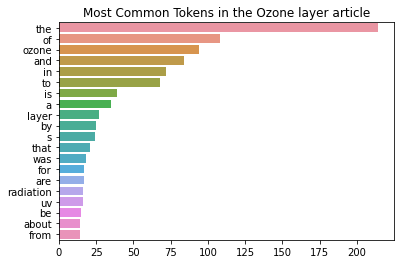

In [13]:
amount = [v for k,v in sorted_words.items()]
words = [k for k,v in sorted_words.items()]
sns.barplot(x = amount[0:20] , y = words[0:20]).set(title = 'Most Common Tokens in the Ozone layer article')

In [14]:
stop_words = ['the', 'of', 'and', 'in', 'a', 'is', 'an', 'small', 'for', 'on', 'than', 'realation',
              'which', 'by', 'less', 'over', 'per', 'with', 'that', 'was', 'are', 'at', 'million',
              'all', 'to', 's', 'uv', 'be', 'or', 'most', 'it', 'o', 'still', 'other', 'although', 
              'contains', 'parts', 'as', 'while', 'high', 'whole', 'about', 'from', 'lower', 'found',
              'portion', 'mainly', 'its', 'relation', 'have', 'this', 'has', 'm', 'into', 'can', 'out', 
              'being', 'were', 'used', 'these', 'also', 'between', 'because', 'united', 'nations', 'd']

In [17]:
def remove_stop_words(words, stop_words):
  return [word for word in words if word not in stop_words]

filtered_collection = remove_stop_words(low_text, stop_words)
counted_filtered_collection = count_frequency(filtered_collection)
sorted_filtered_collection = sort_frequency(counted_filtered_collection)

[Text(0.5, 1.0, 'The 25 Most frequent words in the filtered collection')]

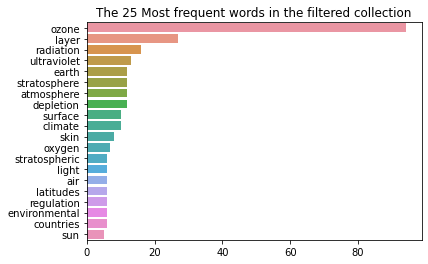

In [26]:
filtered_amount = [v for k,v in sorted_filtered_collection.items()]
filtered_words = [k for k,v in sorted_filtered_collection.items()]
sns.barplot(x = filtered_amount[0:20] , y = filtered_words[0:20]).set(title = 'The 25 Most frequent words in the filtered collection')